<a href="https://colab.research.google.com/github/Shakya-Chakraborty/ML-Projects/blob/main/Facebook_Ad_Optimization/Facebook_Ad_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('FacebookAd.csv')

In [ ]:
dataset.head()

,Advertisement 1,Advertisement 2,Advertisement 3,Advertisement 4,Advertisement 5,Advertisement 6,Advertisement 7,Advertisement 8,Advertisement 9,Advertisement 10
0,0,0,0,1,0,1,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.isnull().sum()

Advertisement 1     0
Advertisement 2     0
Advertisement 3     0
Advertisement 4     0
Advertisement 5     0
Advertisement 6     0
Advertisement 7     0
Advertisement 8     0
Advertisement 9     0
Advertisement 10    0
dtype: int64

###Implementation using UCB

In [56]:
import math
T = 220
num_ads = 10
ads_selected = []
numbers_of_selections = [0] * num_ads
sums_of_rewards = [0] * num_ads
total_reward = 0

for n in range(0, T):
  ad = 0
  max_upper_bound = 0
  for i in range(0, num_ads):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = float('inf')
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

###Histogram Visualization

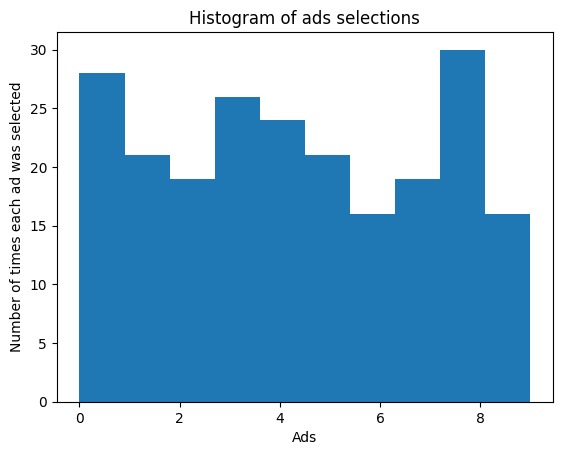

In [57]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

###Implementation Using Thomson Sampling

In [63]:
import random
N = 220
num_ads = 10
ads_selected_thomson = []
num_of_rewards_1 = [0] * num_ads
num_of_rewards_0 = [0] * num_ads
total_reward_thomson = 0
for n in range(0, N):
  ad_thomson = 0
  max_random = 0
  for i in range(0, num_ads):
    random_beta = random.betavariate(num_of_rewards_1[i] + 1, num_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad_thomson = i
  ads_selected_thomson.append(ad_thomson)
  reward = dataset.values[n, ad_thomson]
  if reward == 1:
    num_of_rewards_1[ad_thomson] = num_of_rewards_1[ad_thomson] + 1
  else:
    num_of_rewards_0[ad_thomson] = num_of_rewards_0[ad_thomson] + 1
  total_reward_thomson = total_reward_thomson + reward

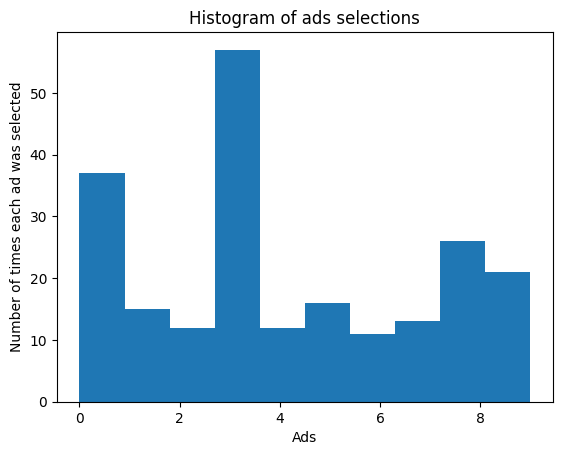

In [64]:
plt.hist(ads_selected_thomson)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

#### We can see that after as low as 220 rounds of checking Thomson Sampling still selects the best ad correctly, but UCB fails to do so. So we can say that Thomson Sampling works better, because it is a predictive model.